# Machine learning.
# Fitness club: churn prediction.

In [ ]:
!pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)


**Цель проекта:** 
разработать стратегию взаимодействия с клиентами фитнесс центра на основе аналитических данных. 

**Задача проекта**: — провести анализ оттока клиентов и подготовить план действий по их удержанию.


**Описание данных:**

Набор данных включает следующие поля:

'Churn' — факт оттока в текущем месяце;

Текущие поля в датасете:

Данные клиента за предыдущий до проверки факта оттока месяц:

'gender' — пол;

'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);

Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
'Phone' — наличие контактного телефона;

'Age' — возраст;

'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);

'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);

'Group_visits' — факт посещения групповых занятий;

'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;

'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;

'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

**ШАГ 1. Загрузка данных**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math as m
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV



In [ ]:
df = pd.read_csv ('.../datasets/gym_churn.csv')
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [ ]:
df.duplicated().sum()

0

Пропусков и дубликатов нет, данные численные. Мы имеем 4000 строк и 14 столбцов в датафрейме.

**ШАГ 2. Исследовательский анализ данных (EDA)**

**Отсутствующие признаки, средние значения и стандартные отклонения.**

Для начала приведем названия столбцов к нижнему регистру:

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Что можно уже сейчас сказать о данных:

Среди клиентов фитнесс-клуба мужчин и женщин примерно поровну.

Больше 80% клиентов предпочитают посещать фитнесс-клуб рядом с домом.

Около половины клиентов являются сотрудниками компании-партнёра клуба.

30% клиентов использовали промо-код от знакомого при оплате первого абонемента.

Клиенты покупают абонемент на 1, 6 или 12 месяцев. Половина посетителей приобрели абонемент на 1 месяц.

В среднем 40% посетителей занимается вместе с друзьями.

Средний возраст клиентов - 29 лет. Максимальный 41 год, минимальный - 18 лет.

В среднем клиенты тратят 147 руб. на дополнительные услуги.

3,7 месяцев - средний срок "жизни" посетителя.

1,8 раз - средняя частота посещения занятий в неделю. 1,7 раз - в неделю за прошлый месяц.

26% посетителей в оттоке.

Также стоит отметить, что мы имеем большой разброс в данных по стандартному отклонению, от 0,2  до 96,3 (avg_additional_charges_total). Веса для разных признаков должны учитывать масштаб признаков. Так, у признаков с меньшим масштабом веса должны быть больше, а у остальных — меньше. При этом значения коэффициентов следует подобрать такими, чтобы можно было оценить вклад каждого признака в общую взвешенную сумму.
Чтобы веса можно было сравнивать, мы приведем признаки единому масштабу, то есть стандартизируем. Сделаем это в следующем шаге. 



**Средние значения и распределения признаков в двух группах — тех, кто ушел в отток и тех, кто не попал в отток.**



In [ ]:
df.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


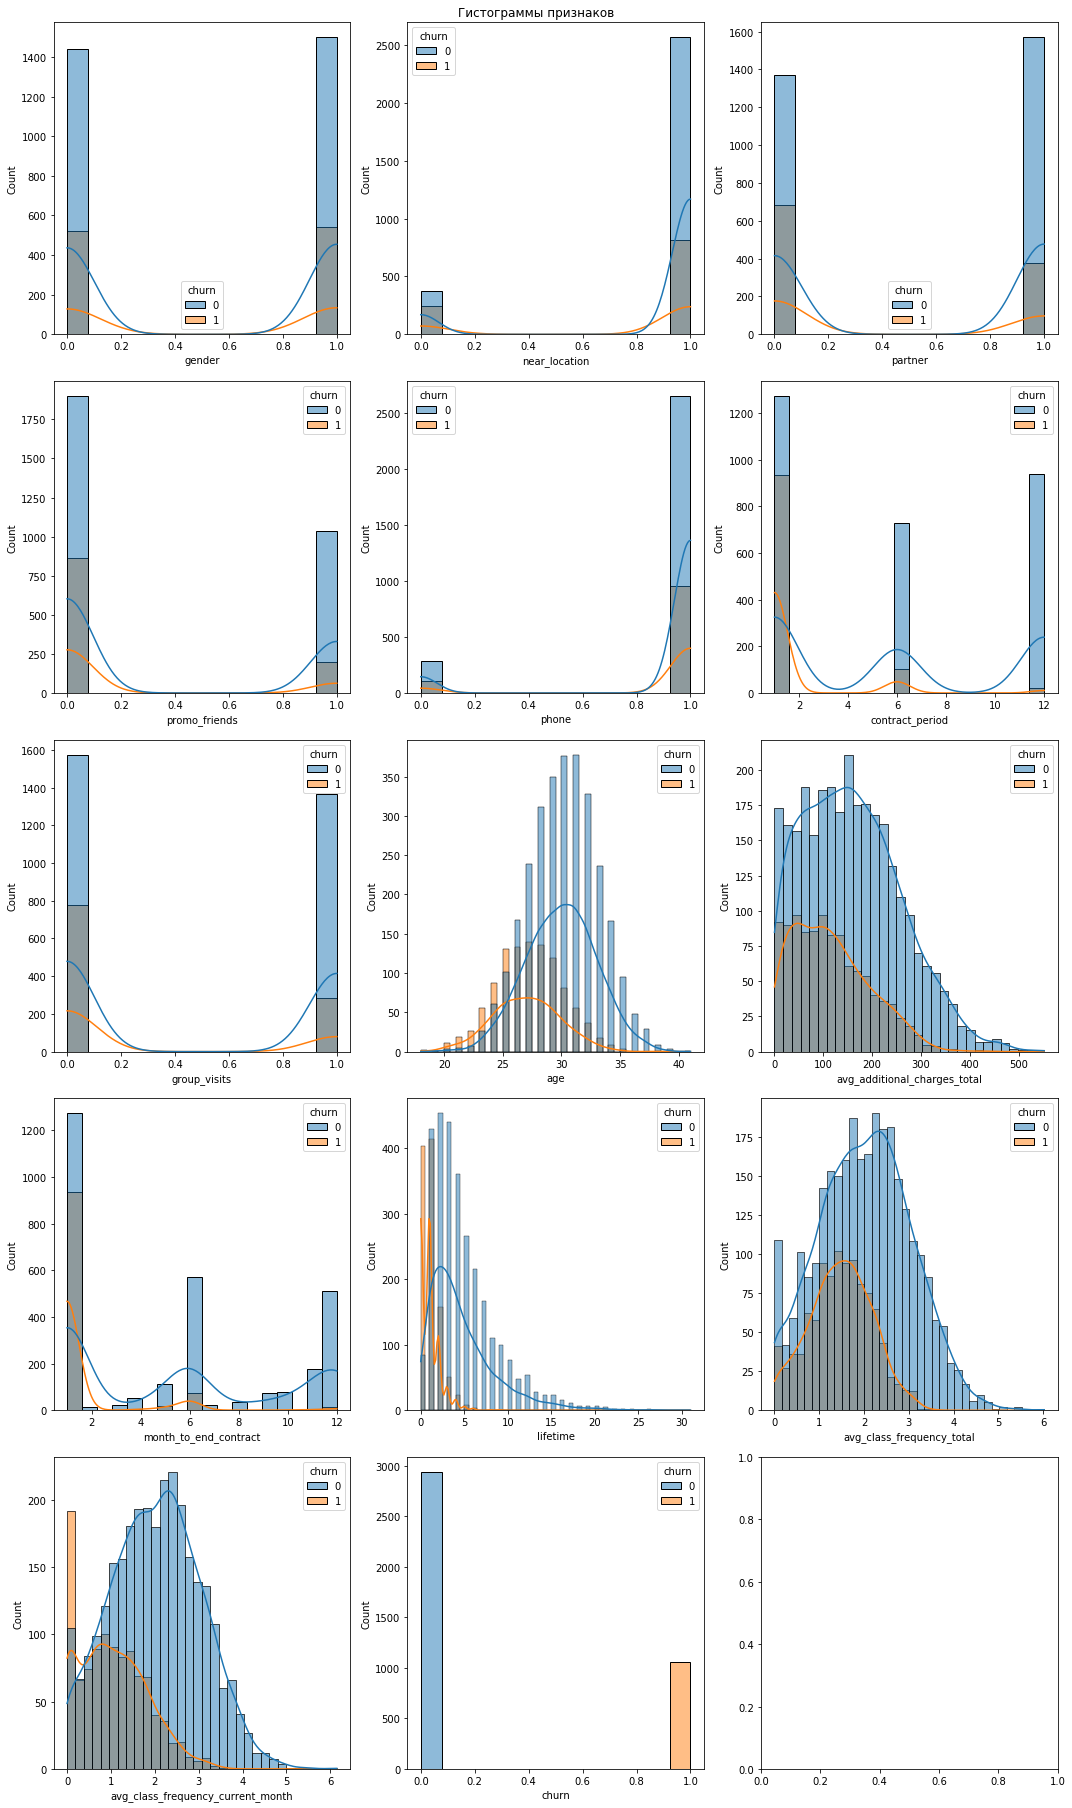

In [ ]:
WIDTH = 3
plot_amount = len(df.columns)
height = plot_amount//WIDTH + 1

fig, axs = plt.subplots(height, WIDTH, figsize=(15, 25))
fig.suptitle('Гистограммы признаков',  y=1.003, size=12)

for item, ax in zip(df.columns, np.ravel(axs)):
    sns.histplot(data = df, x=item, hue='churn', ax=ax, kde=True)

plt.tight_layout()
plt.show()


Между теми, кто ушел и остался, нет различия по половой принадлежности и факту оставления телефонного номера.

Среди тех, кто остался, а, следовательно, лоялен, больше тех, кто живет/работает близко с фитнесс-клубом, приглашены друзьями и занимается с ними, получил скидку на абонемент как сотрудник компании-партнера, чей абонемент куплен на более длительный срок, кто старше, кто дополнительно тратит больше, кто уже дольше занимается и чаще посещает фитнесс-клуб. Чаще всего клиенты клуба покупают абонемент на месяц, но при этом у них наблюдается факт оттока в большей степени. Те, кто покупают абонемент на 12 месяцев, реже всего уходят в дальнейшем.

**Матрица корреляций.**

In [ ]:
cm = df.corr()

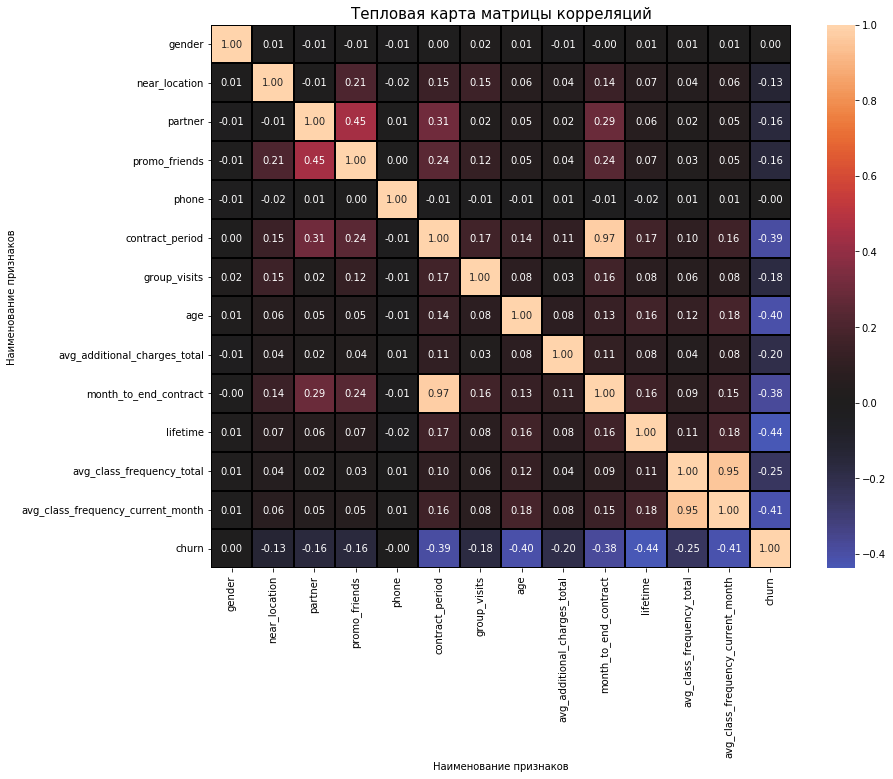

In [ ]:
plt.figure(figsize = (13, 10))
plt.title('Тепловая карта матрицы корреляций', size = 15)
sns_plot = sns.heatmap(cm, annot=True, fmt='.2f', 
                      linewidth=1, linecolor='black', vmax=1, center=0)
fig = sns_plot.get_figure()
plt.xlabel('Наименование признаков')
plt.ylabel('Наименование признаков')
plt.show()

Мы наблюдаем сильную корреляцию между признаками:

'Contract_period' (срок до окончания текущего действующего абонемента в месяцах) и 'Month_to_end_contract' (длительность текущего действующего абонемента) - 0,97;

'Avg_class_frequency_total' (средняя частота посещений в неделю за все время с начала действия абонемента) и 'Avg_class_frequency_current_month' (средняя частота посещений в неделю за предыдущий месяц) - 0,95.

Эти признаки по сути отражают один и тот же процесс.

Сильнее всего с оттоком связан лайфтайм (-0,44), на втором месте возраст (-0,4) и средняя частота посещений за предыдущий месяц (-0,41), на третьем - длительность абонемента (-0,39) и количество времени до его истечения (-0,38). Это пожтверждает предыдущие выводы. 

Таким образом, можно утверждать, что на отток влияют такие факторы, как время с момента первого обращения в фитнесс-центр, возраст клиента, частота посещений, длительность абонемента и количество времени до его истечения. 



**ШАГ 3. Модель прогнозирования оттока клиентов.**

**Модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.**


In [ ]:
#удалим признаки с высокой корреляцией
df.drop(['avg_class_frequency_current_month','month_to_end_contract'], axis=1, inplace=True)

In [ ]:
print('Размерность датасета после EDA: {}'.format(df.shape))

Размерность датасета после EDA: (4000, 12)


In [ ]:
#выделим из данных целевой вектор и матрицу признаков
X = df.drop('churn', axis=1)
y = df['churn']
#разделим на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
#перед обучением стандартизируем признаки
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

**Обучение модели на train-выборке логистической регрессией и случайным лесом.**

In [ ]:
#логистическая регрессия
lr_model = LogisticRegression(solver='lbfgs', random_state=0)
lr_model.fit(X_train_st, y_train)

y_pred_lr = lr_model.predict(X_test_st)

In [ ]:
#случайный лес 
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train_st, y_train)

y_pred_rf = rf_model.predict(X_test_st)

**Аccuracy, precision и recall (для обеих моделей на валидационной выборке).**

In [ ]:
def print_metrics(y_true, y_pred, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [ ]:
print_metrics(y_test, y_pred_lr, title='Метрики для модели логистической регрессии:')
print_metrics(y_test, y_pred_rf, title = 'Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.91
	Precision: 0.83
	Recall: 0.83
Метрики для модели случайного леса:
	Accuracy: 0.89
	Precision: 0.81
	Recall: 0.79


Значение Accuracy отличается на две сотые в пользу регрессии и равно 0,91 и 0,89, что является неплохим результатом. Это доля верно угаданных ответов из всех прогнозов. Чем ближе значение accuracy к 100%, тем лучше. Метрика Precision характеризует долю правильных ответов только среди целевого класса. Здесь эта метрика равна 0.83 в модели регрессии и 0,81 лоя случайного леса. Recall показывает, сколько реальных объектов "1" класса мы смогли обнаружить с помощью модели. Для случая логистической регрессии данная метрика также лучше, 0,83 против 0,79.

Следовательно, модель логистической регрессии на основании метрик показала себя лучше.

**ШАГ 4. Кластеризация клиентов**

In [ ]:
#стандартизация данных
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#матрица расстояний
linked = linkage(X_sc, method = 'ward')

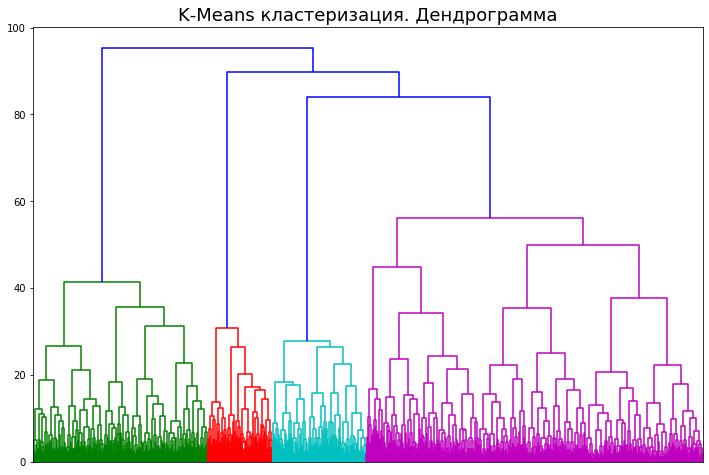

In [ ]:
plt.figure(figsize=(12, 8))  
dendrogram(linked, orientation='top', no_labels=True)
plt.title('K-Means кластеризация. Дендрограмма', size=18)
plt.show()

Число клиентских кластеров - 4 (исходя из количества цветных деревьев на дендрограмме).

**Обучение моделм кластеризации на основании алгоритма K-Means, прогноз кластеров клиентов.**

In [ ]:
km = KMeans(n_clusters = 5, random_state=0) # задаём число кластеров, как указано в задаче
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров


In [ ]:
# сохраняем метки кластера в поле датасета
df['cluster_km'] = labels
# выводим статистику по средним значениям признаков по кластеру
df_cluster = df.groupby(['cluster_km']).mean()
df_cluster.T


cluster_km,0,1,2,3,4
gender,0.499109,0.488571,0.505300,0.544202,0.523316
near_location,0.000000,0.995238,1.000000,1.000000,0.862694
partner,0.488414,0.955238,0.238516,0.250287,0.471503
promo_friends,0.076649,0.892381,0.059187,0.079219,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,3.032086,7.660952,2.819788,4.528129,4.777202
group_visits,0.235294,0.458095,0.000000,1.000000,0.427461
age,28.721925,29.543810,28.770318,29.536165,29.297927
avg_additional_charges_total,137.540009,155.861428,143.383993,148.088897,144.208179
lifetime,3.060606,4.380952,3.343640,3.761194,3.940415


По гендеру все кластеры распределены примерно одинаково. Из этой таблицы сразу видно, что:
№0 находится далеко от фитнесс-клуба, а №3 и №2 ближе всех. №1 использует скидки партнера и промокоды друзей, №4 не оставляет номер телефона. №1 заключает самые длинные контракты, а №2 самые короткие, и при этом вовсе не посещает групповые занятия. №1 дополнительно тратит больше, а №0 меньше. Период жизни №1 самый высокий, а у №0 самый низкий. №1 и №3 чаще всех посещают занятия и меньше всех были замечен в оттоке, в то время как №0 имеет самый высокий средний показатель оттока.

**Распределение признаков для кластеров**

In [ ]:
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total',
       'churn', 'cluster_km'],
      dtype='object')

Графики для дискретных переменных:

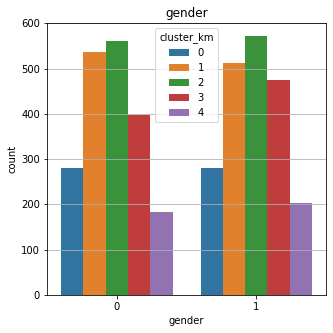

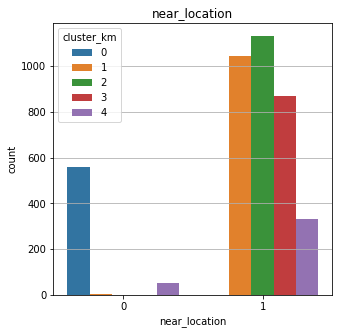

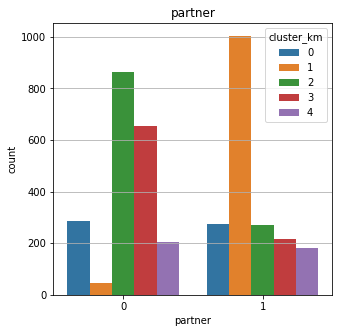

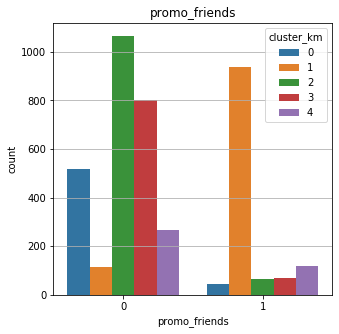

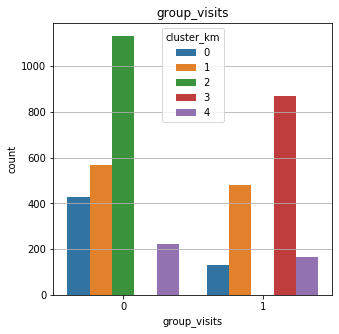

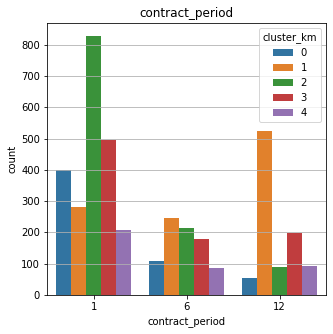

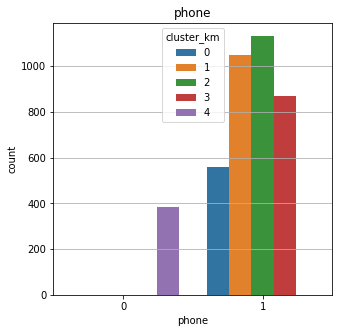

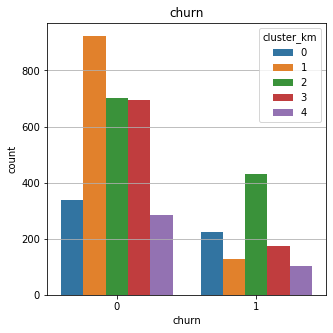

In [ ]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'group_visits', 'contract_period', 'phone', 'churn']:
    plt.figure(figsize=(5, 5))
    ax = sns.countplot(data=df, x = df[column], hue='cluster_km')
    plt.title(column)
    ax.yaxis.grid(True)
    ax.xaxis.grid(False)
    plt.show()

Графики для непрерывных переменных:

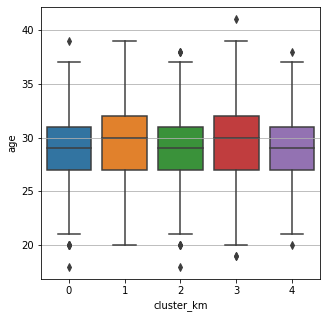

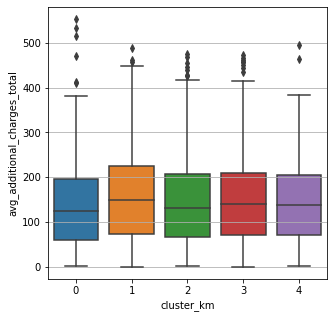

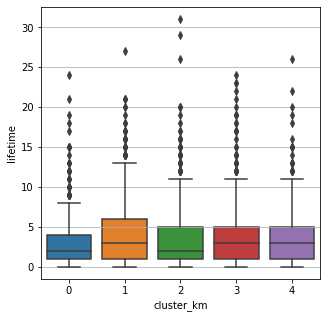

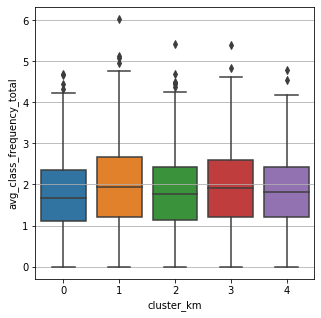

In [ ]:
for column in ['age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total']:
    plt.figure(figsize=(5, 5))
    ax = sns.boxplot(x = 'cluster_km', y = df[column], data = df)
    ax.yaxis.grid(True)
    ax.xaxis.grid(False)
    plt.show()

**Кластер 0** - живут/работают дальше всех от фитнесс-клуба, меньше пользуются промокодами друзей, младше, дополнительно тратят меньше денег, имеют низкий период “жизни”.
 
**Кластер 1** - живут/работают ближе от фитнесс-клуба, большее количество сотрудников компании-партнёра клуба, больше всего использовали промо-код от друзей при оплате первого абонемента, контракт заключен на самый длительный период, старше, дополнительно тратят больше денег, имеют длинный период “жизни” и больше занятий в неделю.
 
**Кластер 2** -  живут/работают близко от фитнесс-клуба, меньше всех посещают групповые занятия, меньшее количество сотрудников компании-партнёра клуба, короткий контракт, младше, имеют меньше занятий в неделю.
 
**Кластер 3** - старше всех, более не имеют особенных отличий по какому-либо признаку, средние показатели.
 
**Кластер 4** - младше, не оставили номер телефона,  имеют меньше занятий в неделю, самый малочисленный кластер.


**Доля оттока для каждого полученного кластера.**

In [ ]:
clusters_churn = df.groupby('cluster_km').agg({'churn': ['sum', 'count', lambda x: ((x.sum()/x.count())*100).round(2)]})
clusters_churn.columns = ['churn_count', 'all_count', 'churn_rate, %'] 

clusters_churn

,churn_count,all_count,"churn_rate, %"
cluster_km,,,
0,224,561,39.93
1,127,1050,12.10
2,432,1132,38.16
3,175,871,20.09
4,103,386,26.68


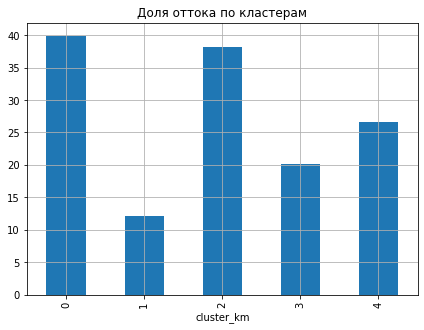

In [ ]:
clusters_churn['churn_rate, %'].plot(kind = 'bar', grid = True, figsize=(7,5))
plt.title('Доля оттока по кластерам')
plt.show()


Более всего склонны к отткоу клиенты из кластера №0, 39,93%. На втором месте клиенты из кластера №2, 38,16%. Самые надежные - клиенты кластера №1, доля их оттока составляет 12,1%.

**ШАГ 5.**

**ВЫВОДЫ:**
 
Для исследования была выбрана модель логистической регрессии.
Метрики для модели логистической регрессии показали лучший результат  по сравнению с метриками для случайного леса. 
 
Среди клиентов фитнесс-клуба мужчин и женщин примерно поровну.
Больше 80% клиентов предпочитают посещать фитнесс-клуб рядом с домом.
Около половины клиентов являются сотрудниками компании-партнёра клуба.
30% клиентов использовали промо-код от знакомого при оплате первого абонемента.
Клиенты покупают абонемент на 1, 6 или 12 месяцев. Половина посетителей приобрели абонемент на 1 месяц.
В среднем 40% посетителей занимается вместе с друзьями.
Средний возраст клиентов - 29 лет. Максимальный 41 год, минимальный - 18 лет.
В среднем клиенты тратят 147 руб. на дополнительные услуги.
3,7 месяцев - средний срок "жизни" посетителя.
1,8 раз - средняя частота посещения занятий в неделю. 1,7 раз - в неделю за прошлый месяц.
26% посетителей в оттоке.
 
**Портрет лояльного клиента**: живет/работает близко с фитнесс-клубом, приглашен друзьями и занимается в группе, получил скидку на абонемент как сотрудник компании-партнера, купил абонемент на более длительный срок, средний возраст выше, тратит больше денег на дополнительные услуги, дольше занимается и чаще посещает фитнесс-клуб. 

**Портрет клиента, склонного к оттоку**: покупает абонемент на месяц, младше, является новым клиентом, реже посещает занятия, не имеет скидки как сотрудник компании-партнера, не приглашен другом, не склонен тратить деньги на дополнительные услуги.
 
**РЕКОМЕНДАЦИИ:**

Фитнесс-клубу следует разработать программы для удержания клиентов. Чем дольше клиент посещает занятия, тем комфортнее он себя ощущает, и тем выше его лояльность. Часто люди испытывают стресс, приходя в новые места или начиная заниматься новым делом, тревогу вызывает все неизведанное. Следует помочь клиенту адаптироваться на данном этапе, как только он пришел впервые. Отличным вариантом будет предложить провести экскурсию, рассказать, как все устроено и где что находится. 

Также мы можем отметить связь лояльности с социальной активностью. Больше распространять промокоды, реферальные программы, устраивать коллаборации, совместные акции. Друзья и партнерские программы положительным образом сказываются на решении клиента остаться подольше. Следует стимулировать клиента на групповые занятия. Например, если тренер представит новичка группе, это в разы снизит его стресс от пребывания среди незнакомцев. Общение, возможность новых знакомств и соревновательный дух добавляют мотивацию заниматься спортом.
Рекомендуем делать упор на рекламных акциях среди жителей района, где находится фитнесс-клуб.

Логично, что абонементы на более длительный срок заставляют клиента задержаться. Но не каждый имеет возможность приобрести абонемент на год. Хорошим результатом будет снизить продажи абонементов на месяц. Для этого можно ввести промежуточный вариант на 2 или 3 месяца, стимулируя приобрести именно его, если клиент отказывается от 6 или 12 месяцев.
